<a href="https://colab.research.google.com/github/matthog/MLHW/blob/main/MattHogan_801190363_HW33.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.7532467532467533
Precision: 0.6491228070175439
Recall: 0.6727272727272727
F1 Score: 0.6607142857142857


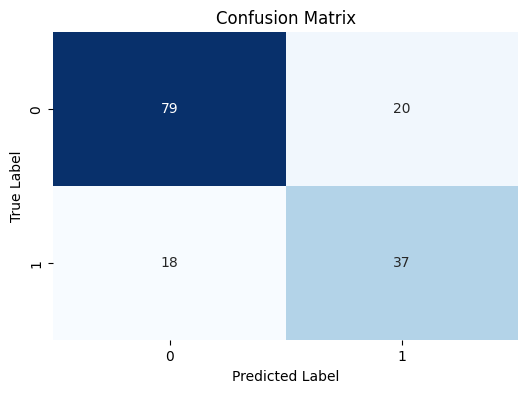

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the dataset
url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/diabetes.csv'
diabetes_data = pd.read_csv(url)

# Split dataset
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize feature set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Predict test set
y_pred = logreg.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Without L2 Penalty:
Accuracy: 0.9385964912280702
Precision: 0.9848484848484849
Recall: 0.9154929577464789
F1 Score: 0.948905109489051

With L2 Penalty:
Accuracy: 0.9736842105263158
Precision: 0.9722222222222222
Recall: 0.9859154929577465
F1 Score: 0.9790209790209791



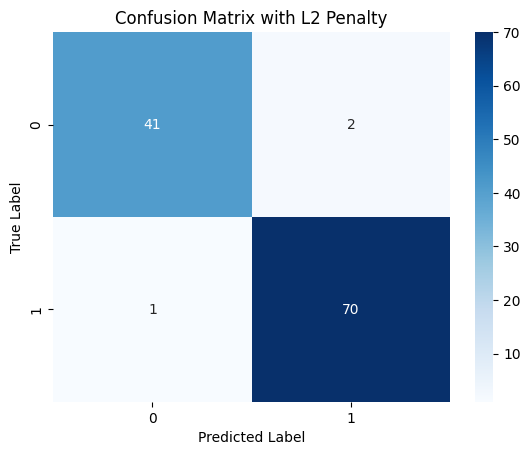

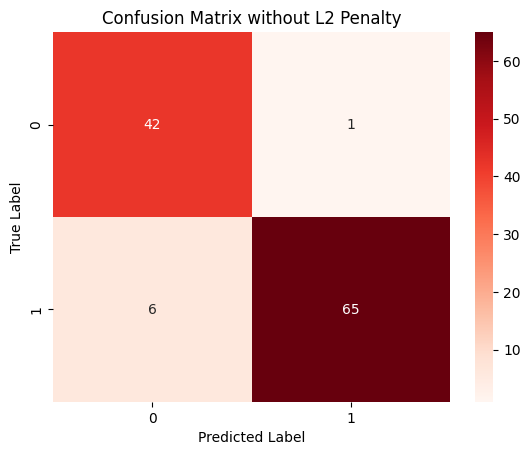

In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cancer dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --- Logistic Regression WITHOUT regularization ---
# This is achieved by setting C to a very large value effectively turning off the penalty
model_no_penalty = LogisticRegression(max_iter=1000, penalty='l2', C=1e10, solver='lbfgs')
model_no_penalty.fit(X_train, y_train)

# Make predictions on test data
y_pred_no_penalty = model_no_penalty.predict(X_test)

# Evaluate the model without penalty
accuracy_no_penalty = accuracy_score(y_test, y_pred_no_penalty)
precision_no_penalty = precision_score(y_test, y_pred_no_penalty)
recall_no_penalty = recall_score(y_test, y_pred_no_penalty)
f1_no_penalty = f1_score(y_test, y_pred_no_penalty)

# Print the evaluation metrics for the model without penalty
print("Without L2 Penalty:")
print(f'Accuracy: {accuracy_no_penalty}')
print(f'Precision: {precision_no_penalty}')
print(f'Recall: {recall_no_penalty}')
print(f'F1 Score: {f1_no_penalty}\n')

# --- Logistic Regression WITH L2 regularization (default) ---
# With the default C=1.0, this adds a moderate penalty
model_with_penalty = LogisticRegression(max_iter=1000, penalty='l2', C=1.0, solver='lbfgs')
model_with_penalty.fit(X_train, y_train)

# Make predictions
y_pred_with_penalty = model_with_penalty.predict(X_test)

# Evaluate the model with penalty
accuracy_with_penalty = accuracy_score(y_test, y_pred_with_penalty)
precision_with_penalty = precision_score(y_test, y_pred_with_penalty)
recall_with_penalty = recall_score(y_test, y_pred_with_penalty)
f1_with_penalty = f1_score(y_test, y_pred_with_penalty)

# Print the evaluation metrics
print("With L2 Penalty:")
print(f'Accuracy: {accuracy_with_penalty}')
print(f'Precision: {precision_with_penalty}')
print(f'Recall: {recall_with_penalty}')
print(f'F1 Score: {f1_with_penalty}\n')

# --- Confusion Matrix for comparison ---
# Confusion matrix for the model with L2 penalty
conf_matrix_with_penalty = confusion_matrix(y_test, y_pred_with_penalty)
sns.heatmap(conf_matrix_with_penalty, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix with L2 Penalty')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Confusion matrix for the model without L2 penalty
conf_matrix_no_penalty = confusion_matrix(y_test, y_pred_no_penalty)
sns.heatmap(conf_matrix_no_penalty, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix without L2 Penalty')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



In [7]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes model
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

# Predictions
y_pred_nb = model_nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

# Print Metrics for Naive Bayes
print(f'Accuracy NB: {accuracy_nb}')
print(f'Precision NB: {precision_nb}')
print(f'Recall NB: {recall_nb}')
print(f'F1 Score NB: {f1_nb}')


Accuracy NB: 0.9649122807017544
Precision NB: 0.958904109589041
Recall NB: 0.9859154929577465
F1 Score NB: 0.9722222222222222


Logistic regression with the L2 penalty performs the best overall, although the naive bayyes is more simple and faster while still performing better than the Logistic regression without penalty generally.

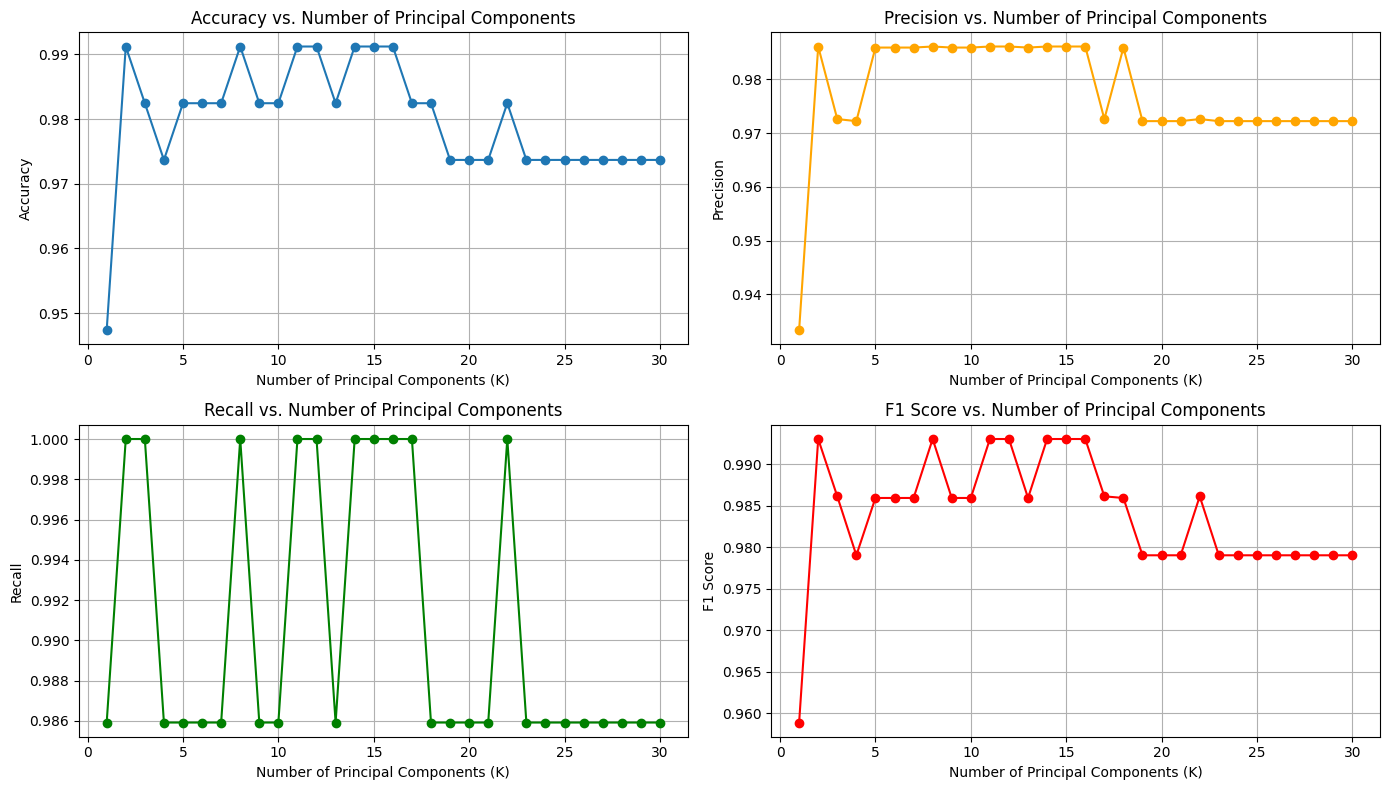

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize lists to store evaluation metrics for different K values
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Perform PCA
max_components = X_train_scaled.shape[1]  # Max number of components is the number of features

for k in range(1, max_components + 1):
    # Apply PCA
    pca = PCA(n_components=k)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Train Logistic Regression
    model = LogisticRegression(solver='lbfgs', max_iter=10000, random_state=42)
    model.fit(X_train_pca, y_train)

    # Make predictions
    y_pred = model.predict(X_test_pca)

    # Calculate evaluation metrics
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

# Plot Accuracy, Precision, Recall, and F1 Score for different values of K
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.plot(range(1, max_components + 1), accuracy_scores, marker='o', label="Accuracy")
plt.title('Accuracy vs. Number of Principal Components')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Accuracy')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(range(1, max_components + 1), precision_scores, marker='o', label="Precision", color='orange')
plt.title('Precision vs. Number of Principal Components')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Precision')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(range(1, max_components + 1), recall_scores, marker='o', label="Recall", color='green')
plt.title('Recall vs. Number of Principal Components')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Recall')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(range(1, max_components + 1), f1_scores, marker='o', label="F1 Score", color='red')
plt.title('F1 Score vs. Number of Principal Components')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('F1 Score')
plt.grid(True)

plt.tight_layout()
plt.show()



K in the range around 20 appears optimal, as that is usually where the data start to platau. PCA appears to be of a similar accuracy, precision, recall, and F1, to  the logistic regression models, and better than the Naive Bayes model. The PCA also uses less features to achieve similar acccuracies.

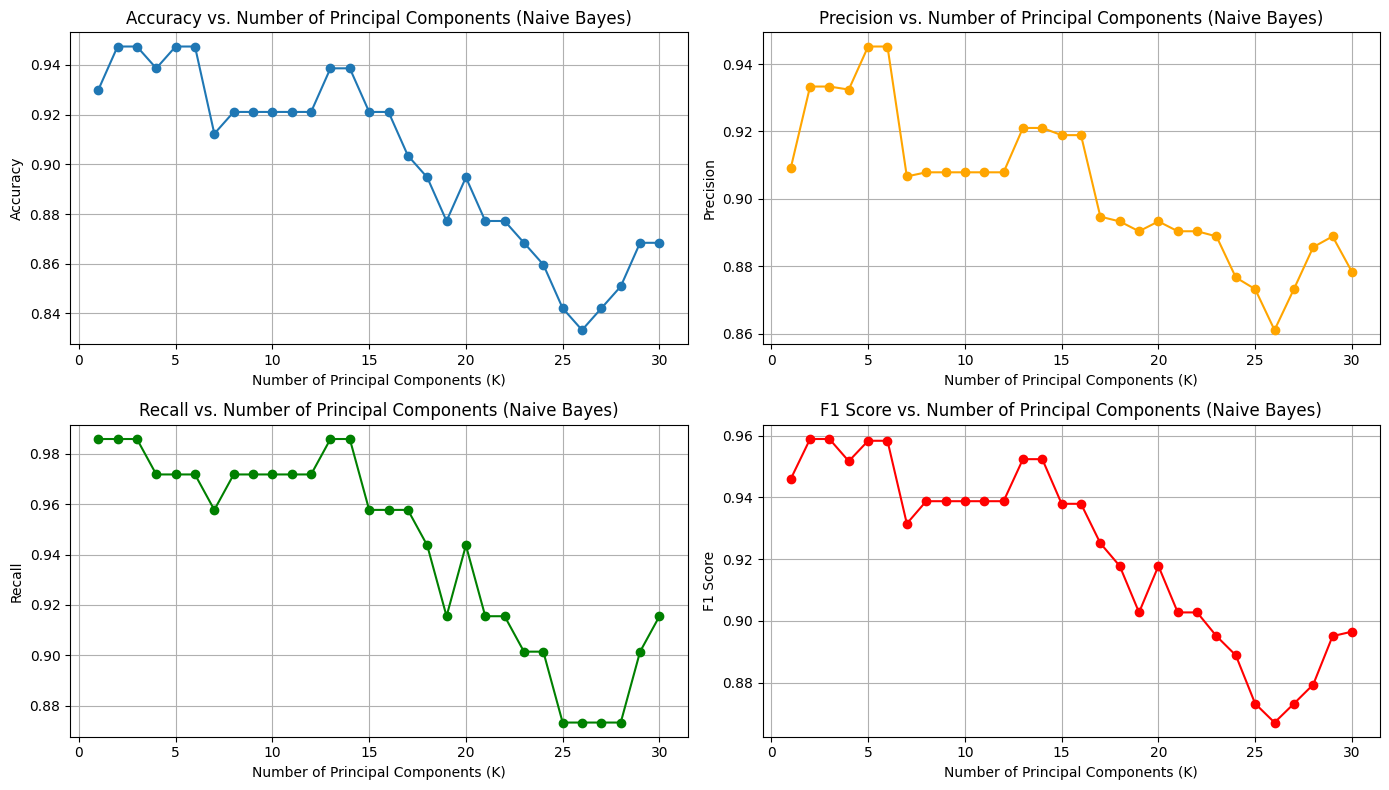

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize lists
accuracy_scores_nb = []
precision_scores_nb = []
recall_scores_nb = []
f1_scores_nb = []

# Perform PCA with different numbers of principal components (N=1, ..., K)
max_components = X_train_scaled.shape[1]

for k in range(1, max_components + 1):
    # Apply PCA
    pca = PCA(n_components=k)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Train a Naive Bayes classifier
    model_nb = GaussianNB()
    model_nb.fit(X_train_pca, y_train)

    # Make predictions
    y_pred_nb = model_nb.predict(X_test_pca)

    # Calculate evaluation metrics
    accuracy_scores_nb.append(accuracy_score(y_test, y_pred_nb))
    precision_scores_nb.append(precision_score(y_test, y_pred_nb))
    recall_scores_nb.append(recall_score(y_test, y_pred_nb))
    f1_scores_nb.append(f1_score(y_test, y_pred_nb))

# Plot Accuracy, Precision, Recall, and F1 Score for different values of K
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.plot(range(1, max_components + 1), accuracy_scores_nb, marker='o', label="Accuracy")
plt.title('Accuracy vs. Number of Principal Components (Naive Bayes)')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Accuracy')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(range(1, max_components + 1), precision_scores_nb, marker='o', label="Precision", color='orange')
plt.title('Precision vs. Number of Principal Components (Naive Bayes)')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Precision')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(range(1, max_components + 1), recall_scores_nb, marker='o', label="Recall", color='green')
plt.title('Recall vs. Number of Principal Components (Naive Bayes)')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Recall')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(range(1, max_components + 1), f1_scores_nb, marker='o', label="F1 Score", color='red')
plt.title('F1 Score vs. Number of Principal Components (Naive Bayes)')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('F1 Score')
plt.grid(True)

plt.tight_layout()
plt.show()


Bayes PCA models appear to have a downward trend in accuracies as K increases, dropping it below all other models past k between 10-15.